In [1]:
#Production data URL: https://raw.githubusercontent.com/bettylucy/ML23/main/VolveProdData.csv

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
welldata=pd.read_csv("https://raw.githubusercontent.com/bettylucy/ML23/main/VolveProdData.csv")

In [3]:
#Reading data file, showing data types and a sample header
welldata.info()
welldata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15832 non-null  object 
 1   WELL_BORE_CODE            15832 non-null  object 
 2   NPD_WELL_BORE_CODE        15832 non-null  int64  
 3   NPD_WELL_BORE_NAME        15832 non-null  object 
 4   NPD_FIELD_CODE            15832 non-null  int64  
 5   NPD_FIELD_NAME            15832 non-null  object 
 6   NPD_FACILITY_CODE         15832 non-null  int64  
 7   NPD_FACILITY_NAME         15832 non-null  object 
 8   ON_STREAM_HRS             15547 non-null  float64
 9   AVG_DOWNHOLE_PRESSURE     9178 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 11  AVG_DP_TUBING             8980 non-null   float64
 12  AVG_ANNULUS_PRESS         7890 non-null   float64
 13  AVG_CHOKE_SIZE_P          8919 non-null   float64
 14  AVG_CH

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0  07-Apr-14  NO 15/9-F-1 C                7405         15/9-F-1 C   
1  08-Apr-14  NO 15/9-F-1 C                7405         15/9-F-1 C   
2  09-Apr-14  NO 15/9-F-1 C                7405         15/9-F-1 C   
3  10-Apr-14  NO 15/9-F-1 C                7405         15/9-F-1 C   
4  11-Apr-14  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                   0.00  ...              %        0.0   
1            0.0                    NaN  ...              %        0.0   
2            0.0                    NaN  ...              %        0.0   
3            0.0                    NaN  ...              %        0.0   
4            0.0                 310.38  ...              %       33.1   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0       0.00           0.00          0.0           0.0           0.0   
1       0.00           0.00          0.0           0.0           0.0   
2       0.00           0.00          0.0           0.0           0.0   
3       0.00           0.00          0.0           0.0           0.0   
4      10.48          33.07          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         OP  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

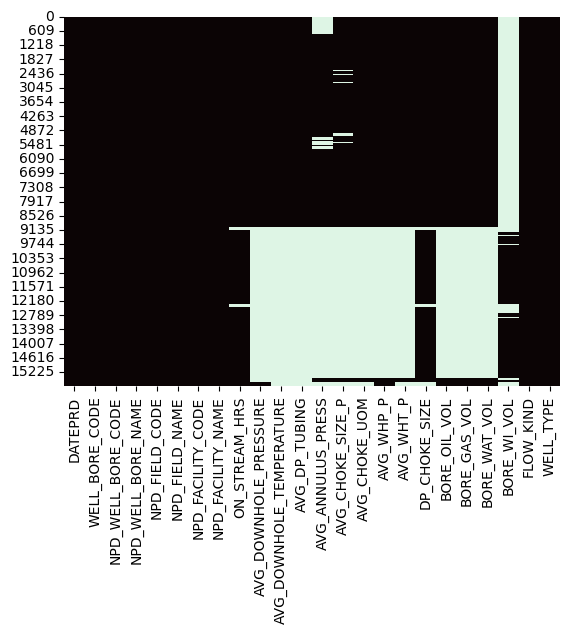

In [4]:
#Missing values 1
sns.heatmap(welldata.isnull(), cbar=False, cmap="mako")
plt.show()

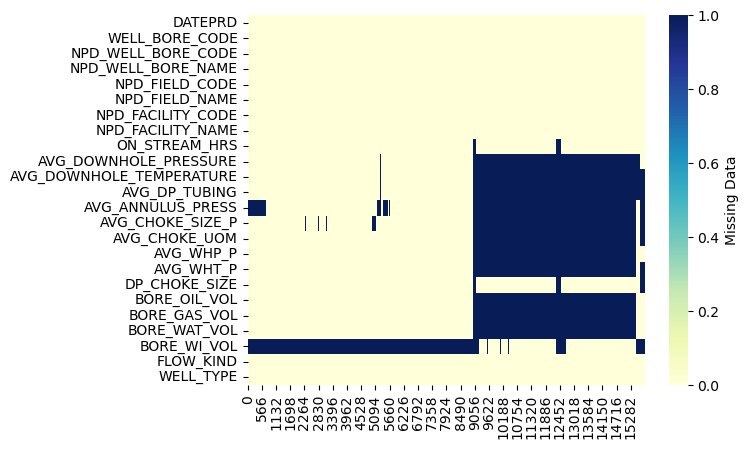

In [5]:
#Missing values 2 (choose this one)
sns.heatmap(welldata.isna().transpose(),
           cmap="YlGnBu",
           cbar_kws={'label':'Missing Data'})
plt.show()

In [6]:
#Size of original dataframe
welldata.shape

(15832, 24)

In [7]:
#Write about ROCCC analysis (YYYNY)

In [8]:
#Distinguish producer from injectors
welldata['WELL_TYPE'].unique()

array(['OP', 'WI'], dtype=object)

In [9]:
#How many wells
welldata['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5693, 5769])

In [10]:
#Finding production wells
welldata[welldata['WELL_TYPE'] == 'OP']['NPD_WELL_BORE_CODE'].unique()

#Storing production wells
welldataproducers=welldata[welldata['WELL_TYPE'] == 'OP']

In [11]:
welldataproducers.head(5)

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0  07-Apr-14  NO 15/9-F-1 C                7405         15/9-F-1 C   
1  08-Apr-14  NO 15/9-F-1 C                7405         15/9-F-1 C   
2  09-Apr-14  NO 15/9-F-1 C                7405         15/9-F-1 C   
3  10-Apr-14  NO 15/9-F-1 C                7405         15/9-F-1 C   
4  11-Apr-14  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                   0.00  ...              %        0.0   
1            0.0                    NaN  ...              %        0.0   
2            0.0                    NaN  ...              %        0.0   
3            0.0                    NaN  ...              %        0.0   
4            0.0                 310.38  ...              %       33.1   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0       0.00           0.00          0.0           0.0           0.0   
1       0.00           0.00          0.0           0.0           0.0   
2       0.00           0.00          0.0           0.0           0.0   
3       0.00           0.00          0.0           0.0           0.0   
4      10.48          33.07          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         OP  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

In [12]:
#Finding injection wells
welldata[welldata['WELL_TYPE'] == 'WI']['NPD_WELL_BORE_CODE'].unique()

#Storing injection wells
welldatainjection=welldata[welldata['WELL_TYPE'] == 'WI']

In [13]:
welldatainjection.head(5)

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
91    07-Jul-14   NO 15/9-F-1 C                7405         15/9-F-1 C   
9001  01-Sep-07  NO 15/9-F-4 AH                5693           15/9-F-4   
9002  02-Sep-07  NO 15/9-F-4 AH                5693           15/9-F-4   
9003  03-Sep-07  NO 15/9-F-4 AH                5693           15/9-F-4   
9004  04-Sep-07  NO 15/9-F-4 AH                5693           15/9-F-4   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
91           3420717          VOLVE             369304    MÆRSK INSPIRER   
9001         3420717          VOLVE             369304    MÆRSK INSPIRER   
9002         3420717          VOLVE             369304    MÆRSK INSPIRER   
9003         3420717          VOLVE             369304    MÆRSK INSPIRER   
9004         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
91             24.0                 215.07  ...              %      52.66   
9001            NaN                    NaN  ...            NaN        NaN   
9002            NaN                    NaN  ...            NaN        NaN   
9003            NaN                    NaN  ...            NaN        NaN   
9004            NaN                    NaN  ...            NaN        NaN   

      AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
91        54.97          24.23        522.0      77846.76        154.47   
9001        NaN            NaN          NaN           NaN           NaN   
9002        NaN            NaN          NaN           NaN           NaN   
9003        NaN            NaN          NaN           NaN           NaN   
9004        NaN            NaN          NaN           NaN           NaN   

      BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
91            NaN  production         WI  
9001          NaN   injection         WI  
9002          NaN   injection         WI  
9003          NaN   injection         WI  
9004          NaN   injection         WI  

[5 rows x 24 columns]

In [14]:
#Dropping unnecessary columns
welldataproducers.drop(labels=['WELL_BORE_CODE',
                        'NPD_FIELD_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)
welldatainjection.drop(labels=['WELL_BORE_CODE',
                        'NPD_FIELD_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
91     07-Jul-14                7405           24.0                 215.07   
9001   01-Sep-07                5693            NaN                    NaN   
9002   02-Sep-07                5693            NaN                    NaN   
9003   03-Sep-07                5693            NaN                    NaN   
9004   04-Sep-07                5693            NaN                    NaN   
...          ...                 ...            ...                    ...   
15624  09-Sep-16                5769            0.0                    NaN   
15625  10-Sep-16                5769            0.0                    NaN   
15626  11-Sep-16                5769            0.0                    NaN   
15627  12-Sep-16                5769            0.0                    NaN   
15633  18-Sep-16                5769            0.0                    NaN   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
91                       108.14         162.41                NaN   
9001                        NaN            NaN                NaN   
9002                        NaN            NaN                NaN   
9003                        NaN            NaN                NaN   
9004                        NaN            NaN                NaN   
...                         ...            ...                ...   
15624                       NaN            NaN              0.287   
15625                       NaN            NaN              0.283   
15626                       NaN            NaN              0.287   
15627                       NaN            NaN              0.287   
15633                       NaN            NaN                NaN   

       AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
91                46.82      52.66      54.97          24.23         522.0   
9001                NaN        NaN        NaN            NaN           NaN   
9002                NaN        NaN        NaN            NaN           NaN   
9003                NaN        NaN        NaN            NaN           NaN   
9004                NaN        NaN        NaN            NaN           NaN   
...                 ...        ...        ...            ...           ...   
15624              0.58       0.09       0.23           0.04           0.0   
15625              0.57       0.09       0.23           0.04           0.0   
15626              0.57       0.09       0.23           0.03           0.0   
15627              0.56       0.09       0.23           0.03           0.0   
15633               NaN        NaN        NaN           0.00           NaN   

       BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
91         77846.76        154.47          NaN  
9001            NaN           NaN          NaN  
9002            NaN           NaN          NaN  
9003            NaN           NaN          NaN  
9004            NaN           NaN          NaN  
...             ...           ...          ...  
15624          0.00          0.00          0.0  
15625          0.00          0.00          0.0  
15626          0.00          0.00          0.0  
15627          0.00          0.00          0.0  
15633           NaN           NaN          0.0  

[6490 rows x 15 columns]

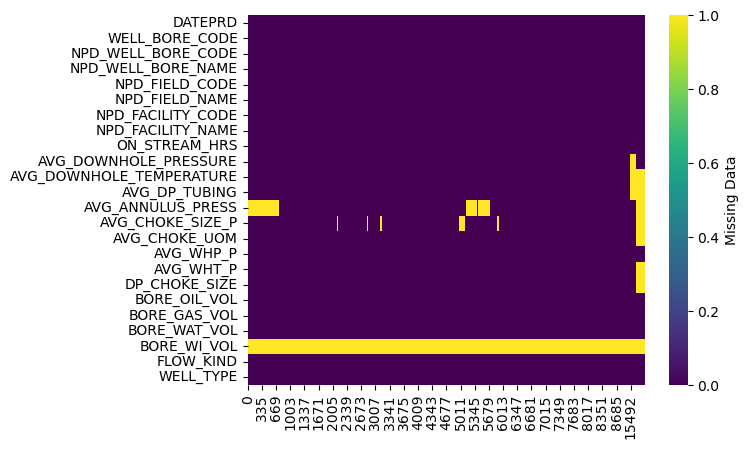

In [15]:
#Missing values for producers
sns.heatmap(welldataproducers.isna().transpose(),
           cmap="viridis",
           cbar_kws={'label':'Missing Data'})
plt.show()

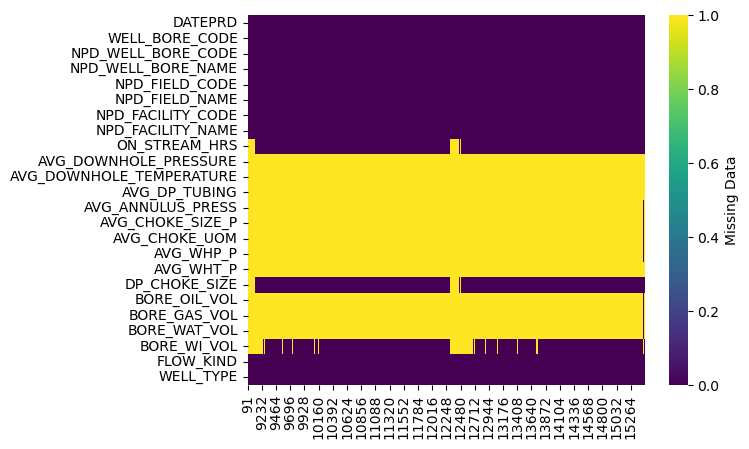

In [16]:
#Missing values for injectors
sns.heatmap(welldatainjection.isna().transpose(),
           cmap="viridis",
           cbar_kws={'label':'Missing Data'})
plt.show()

In [18]:
#Oil production for each producer well
welldataproducers.loc[:,"NPD_WELL_BORE_CODE"] = welldataproducers["NPD_WELL_BORE_CODE"].astype(str)
#welldataproducersfig = welldataproducers.sort_values(by="DATEPRD")
fig = px.scatter(welldataproducers, x="DATEPRD", y=["BORE_OIL_VOL"],
                 color="NPD_WELL_BORE_CODE",
                 hover_name="NPD_WELL_BORE_CODE",
                )
fig.show()

In [21]:
welldataproducersfig = welldataproducers.sort_values(by="BORE_OIL_VOL")
fig = px.line(welldataproducers, x="DATEPRD", y="BORE_OIL_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

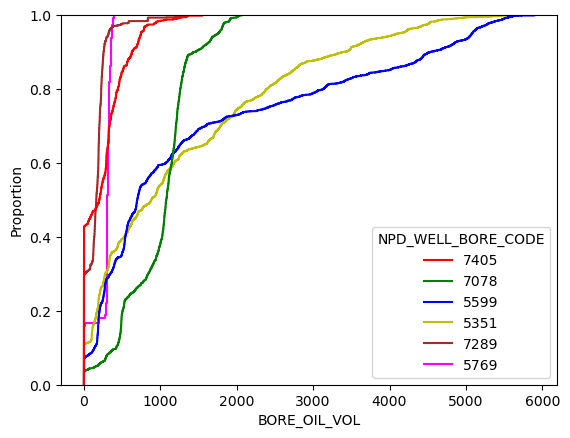

In [22]:
sns.ecdfplot(x='BORE_OIL_VOL',data=welldataproducers, hue='NPD_WELL_BORE_CODE',palette=['r', 'g', 'b', 'y', 'brown', 'magenta'])

plt.show()

<Axes: >

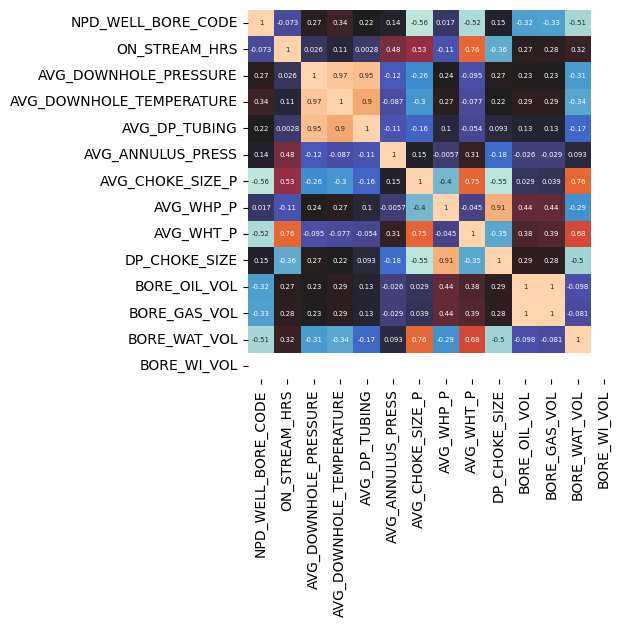

In [23]:
wdc=welldataproducers.drop(labels=['DATEPRD', 
                        'WELL_BORE_CODE',
                        'NPD_FIELD_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)

sns.heatmap(wdc.corr(),annot=True,annot_kws={"size": 5},square=True,cmap='icefire',cbar=False)

/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



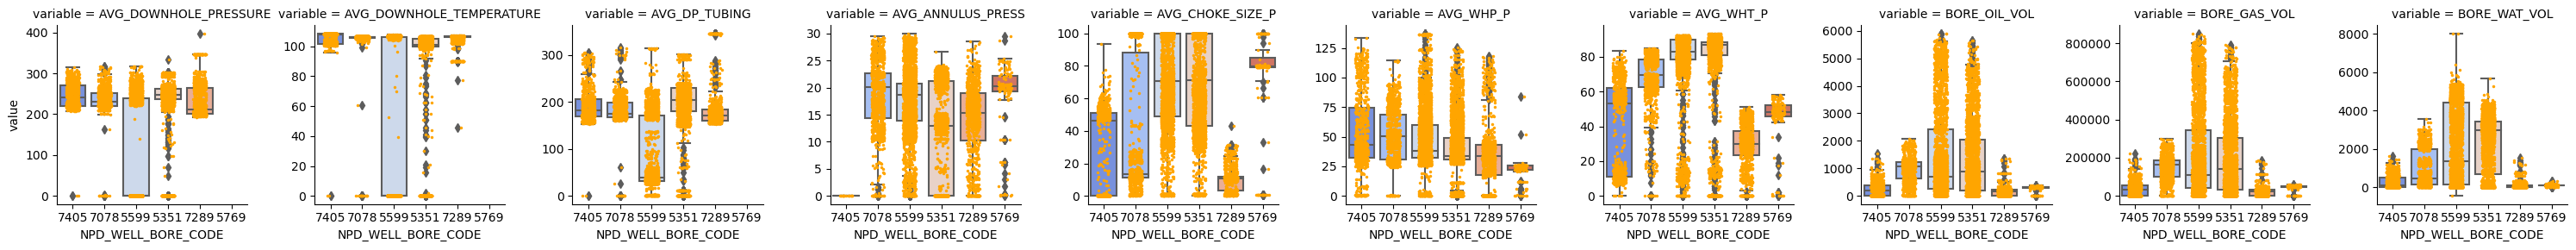

In [24]:
welldatabp = welldataproducers.melt(id_vars=['NPD_WELL_BORE_CODE'])

cols = ['AVG_DOWNHOLE_PRESSURE', 
        'AVG_DOWNHOLE_TEMPERATURE',
        'AVG_DP_TUBING',
        'AVG_ANNULUS_PRESS',
        'AVG_CHOKE_SIZE_P',
        'AVG_WHP_P',
       'AVG_WHT_P',
       'BORE_OIL_VOL',
       'BORE_GAS_VOL',
       'BORE_WAT_VOL']
grid = sns.axisgrid.FacetGrid(welldatabp[welldatabp.variable.isin(cols)], col='variable', sharey=False)
grid.map(sns.boxplot, 'NPD_WELL_BORE_CODE','value',order=['7405','7078','5599','5351','7289','5769'], palette='coolwarm')
grid.map(sns.stripplot, 'NPD_WELL_BORE_CODE','value',order=['7405','7078','5599','5351','7289','5769'], color="orange", jitter=0.2, size=2.5)



/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



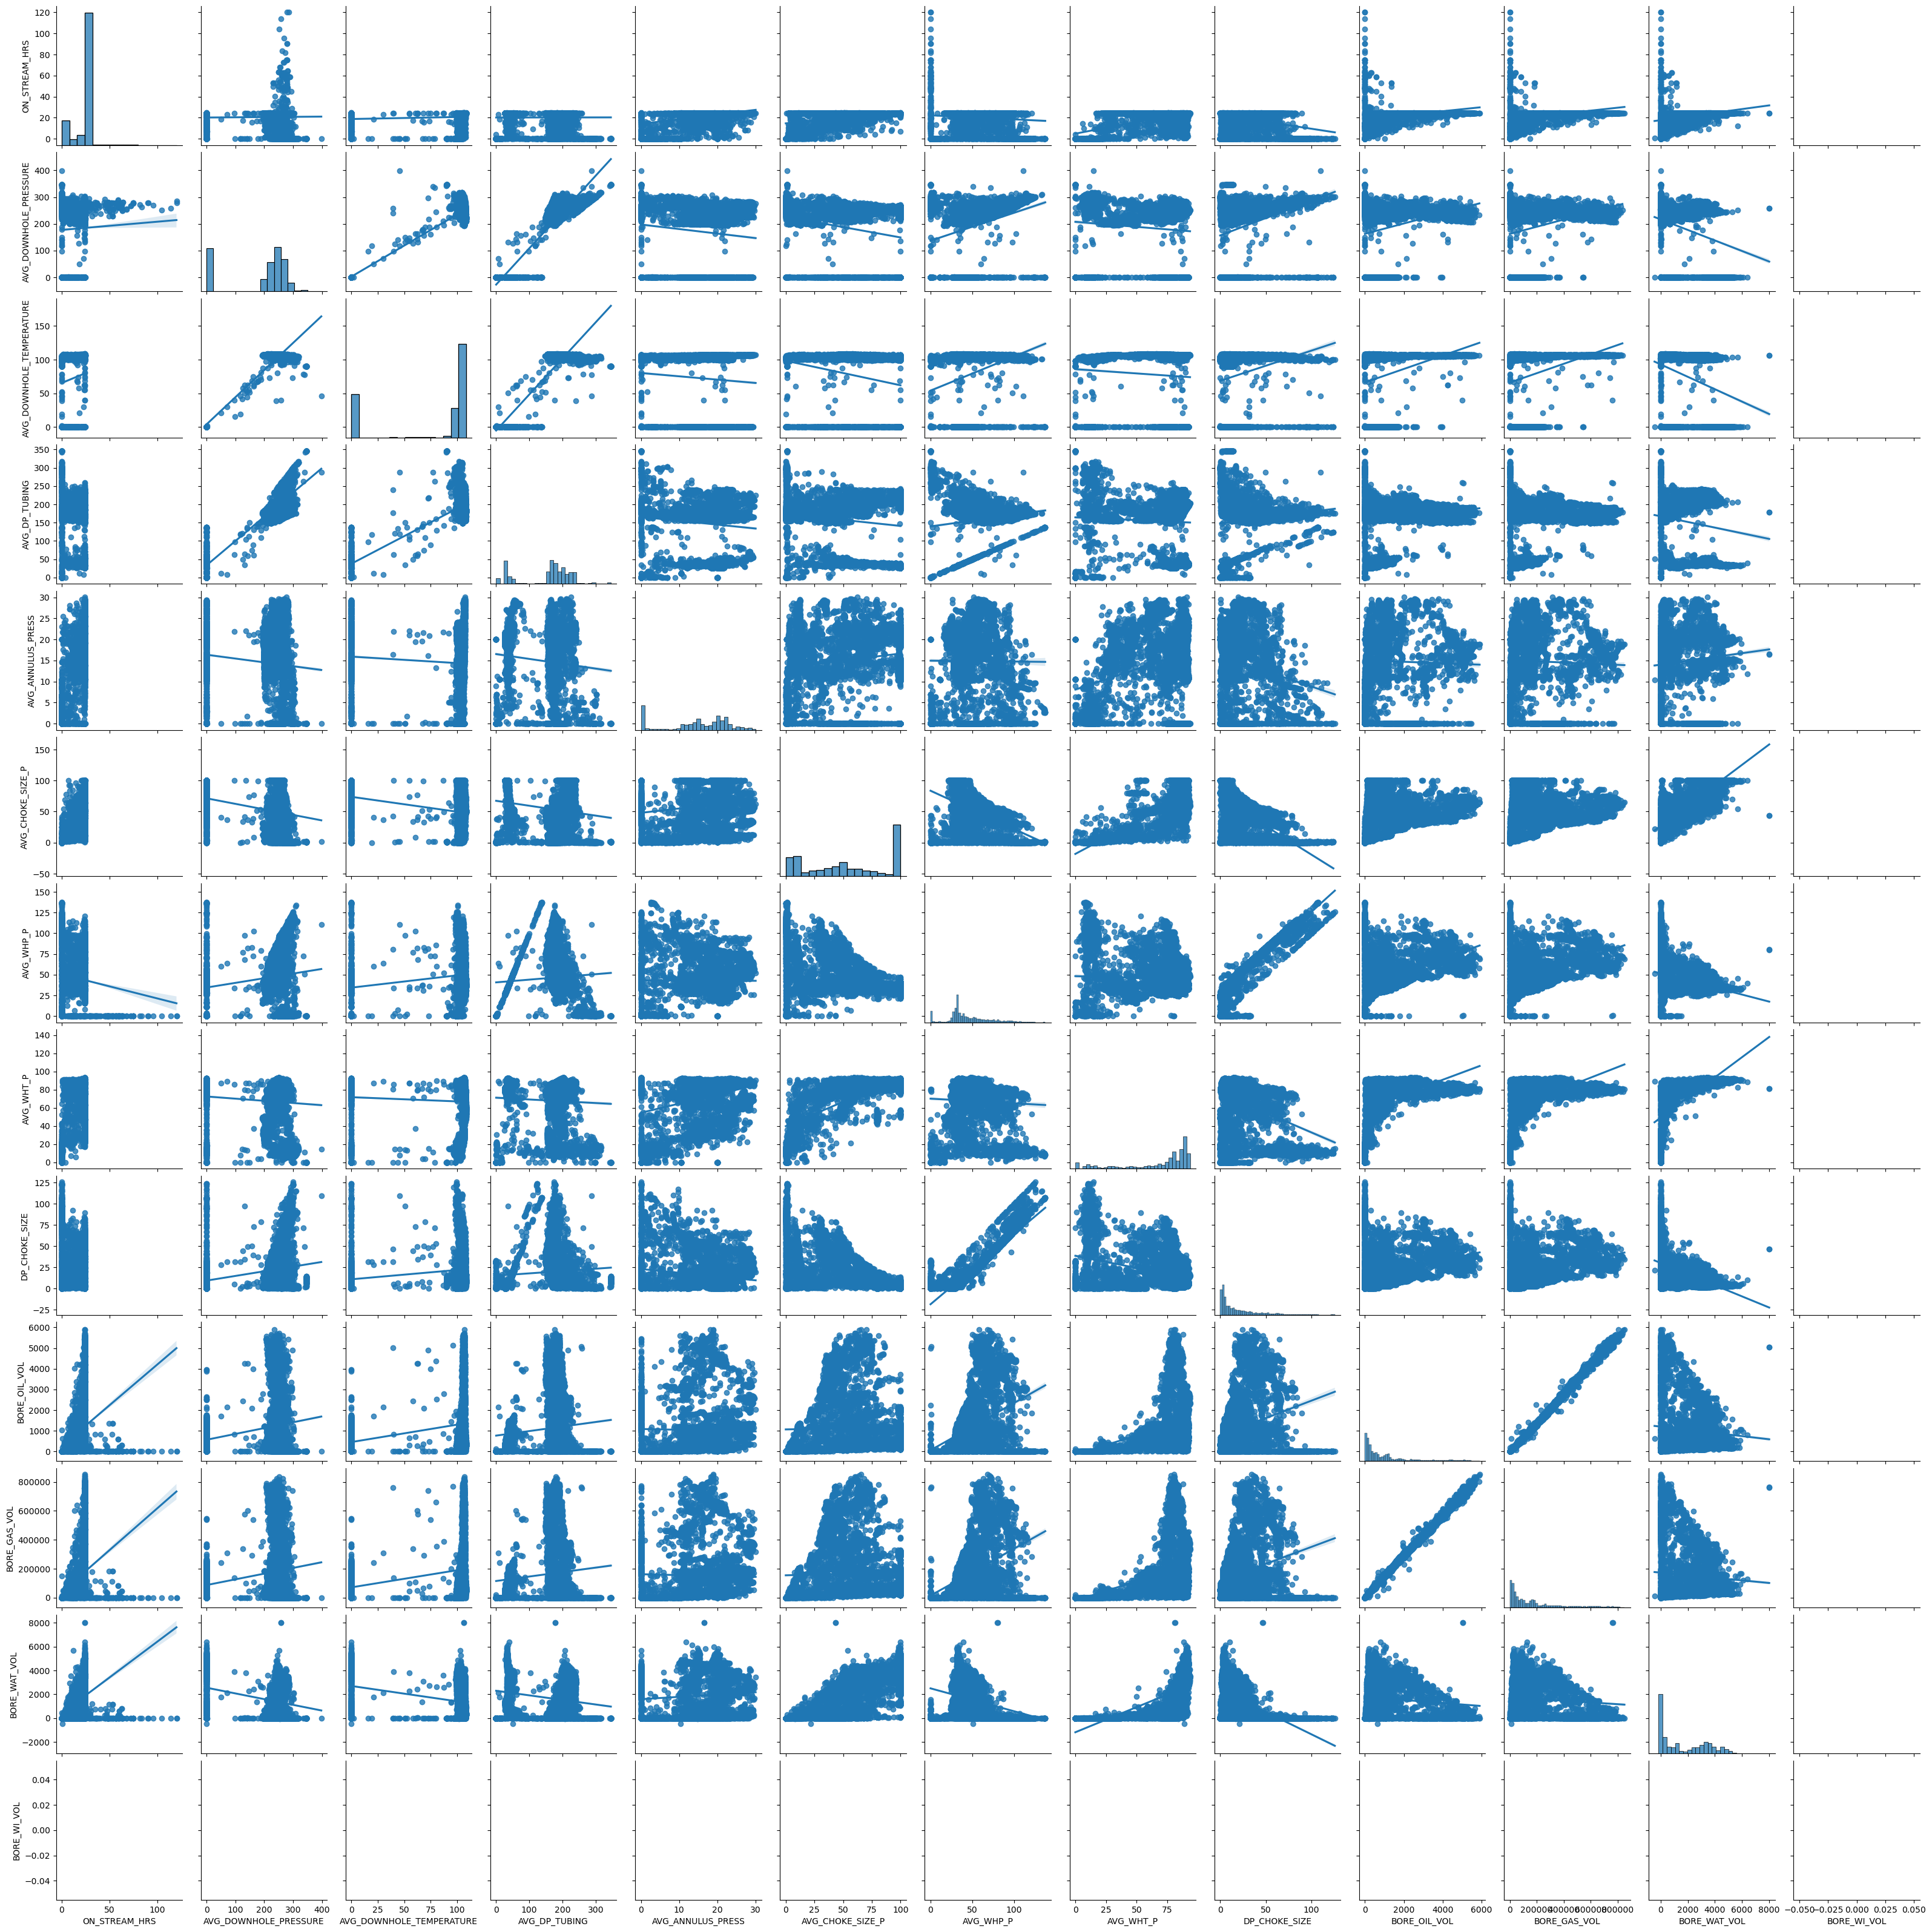

In [25]:
sns.pairplot(wdc, kind="reg")
plt.show()